In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [134]:
# This is a dataset on Abalones and their physical measurements. Age of an abalone is determined by the number
# of 'rings' which can only be seen under a microscope. I am going to attempt to use machine learning to predict
# the number of rings from other measurements that don't require a microscope.

df = pd.read_csv('/Users/jdobrow/Desktop/Data Science/abalone data.txt', error_bad_lines=False,  header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

In [135]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
WholeWeight      4177 non-null float64
ShuckedWeight    4177 non-null float64
VisceraWeight    4177 non-null float64
ShellWeight      4177 non-null float64
Rings            4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [137]:
totalweight = []
for i in range(len(df)):
    totalweight.append(df.ShuckedWeight[i] + df.VisceraWeight[i] + df.ShellWeight[i])

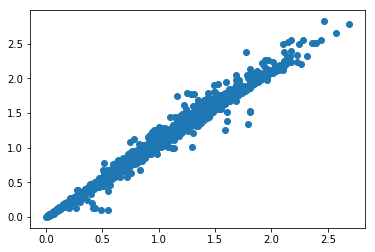

In [138]:
plt.scatter(totalweight, df.WholeWeight)
# The 3 weights don't add up perfectly and there's some outliers. I guess this is just measurement error.
# I'm going to exclude WholeWeight from my model since it is almost a linear combination of 3 other feautres.
# The purpose of this exercise is to compare a KNN model to a linear regression, and using categorical or dummy
# variables aren't good in KNN so I will drop Sex.

In [139]:
clean_df = df.copy()
clean_df.drop(['Sex', 'WholeWeight'], axis=1, inplace=True)

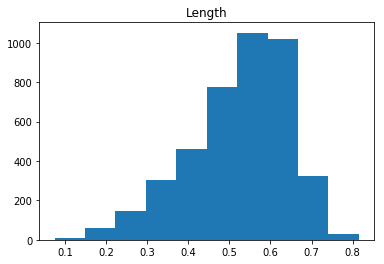

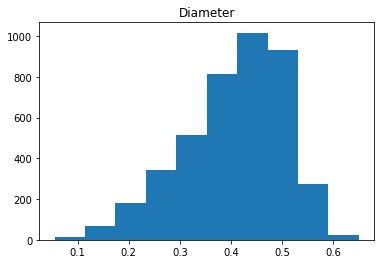

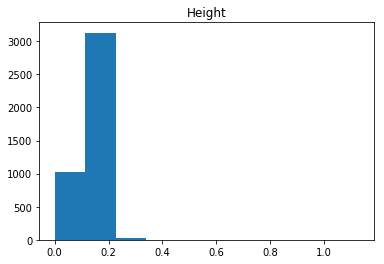

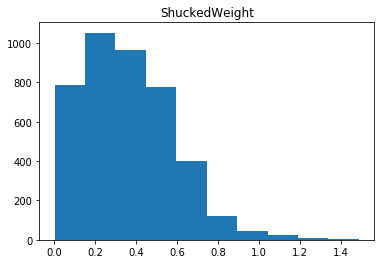

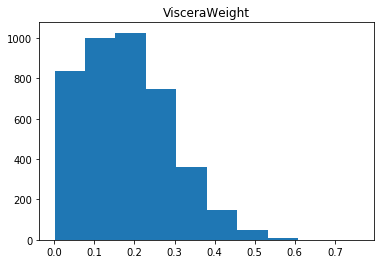

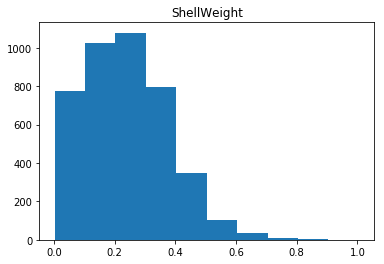

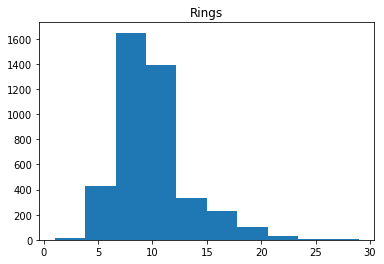

In [140]:
for i in clean_df.columns:
    plt.hist(clean_df[i])
    plt.title(i)
    plt.show()

In [141]:
X = clean_df.iloc[:,:-1]
Y = clean_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

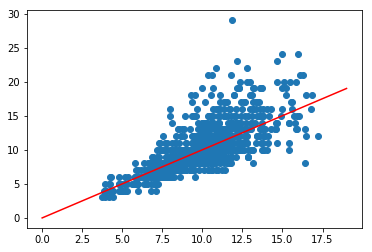

In [142]:
# I don't feel the need to normalize these features since their scales are all pretty close. I'm going to jump
# right into modeling and see what happens.
knn = neighbors.KNeighborsRegressor(n_neighbors=21)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
plt.scatter(y_preds, y_test)
plt.plot(np.arange(0,20), color='red')
plt.show()

In [143]:
score = cross_val_score(knn, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.46 (+/- 0.17)


In [144]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean absolute error of the prediction is: 1.5399103820156452
Mean squared error of the prediction is: 5.003649093874658
Root mean squared error of the prediction is: 2.23688379087396
Mean absolute percentage error of the prediction is: 14.793432163192744


In [145]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
X_test = sm.add_constant(X_test)
y_preds_lin = results.predict(X_test)
results.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     506.8
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:20:36   Log-Likelihood:                -6504.6
No. Observations:                2923   AIC:                         1.302e+04
Df Residuals:                    2916   BIC:                         1.307e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8420      0.329      8.634      0.000       2.197       3.487
Length           -4.2875      2.258     -1.898      0.058      -8.716       0.141
Diameter         17.7269      2.748      6.451      0.000      12.339      23.115
Height           10.3103      1.683      6.125      0.000       7.010      13.611
ShuckedWeight   -11.9124      0.556    -21.436      0.000     -13.002     -10.823
VisceraWeight     1.6908      1.228      1.377      0.169      -0.717       4.099
ShellWeight      19.4167      0.839     23.139      0.000      17.771      21.062
==============================================================================
Omnibus:                      676.028   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1808.056
Skew:                           1.224   Prob(JB):                         0.00
Kurtosis:                       5.975   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_lin)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_lin)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_lin)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_lin) / y_test)) * 100))

Mean absolute error of the prediction is: 1.6547755995700775
Mean squared error of the prediction is: 5.305051076405915
Root mean squared error of the prediction is: 2.303269649087122
Mean absolute percentage error of the prediction is: 16.31779397865806


In [147]:
# KNN performing a little better so far. What if I remove features that aren't correlated?
clean_df.drop(['Length', 'VisceraWeight'], axis=1, inplace=True)

In [151]:
X = clean_df.iloc[:,:-1]
Y = clean_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [152]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
X_test = sm.add_constant(X_test)
y_preds_lin = results.predict(X_test)
results.summary()
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_lin)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_lin)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_lin)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_lin) / y_test)) * 100))

Mean absolute error of the prediction is: 1.6221257636483029
Mean squared error of the prediction is: 5.027770342632377
Root mean squared error of the prediction is: 2.2422690165616563
Mean absolute percentage error of the prediction is: 16.915352740727297


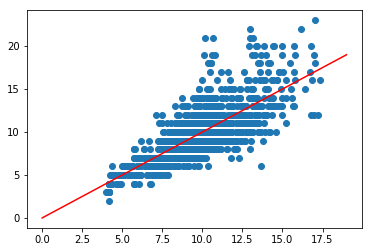

In [153]:
# Nice! Improved the model. Out of curiousity, does this improve KNN as well?
# I don't feel the need to normalize these features since their scales are all pretty close. I'm going to jump
# right into modeling and see what happens.
knn = neighbors.KNeighborsRegressor(n_neighbors=21)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
plt.scatter(y_preds, y_test)
plt.plot(np.arange(0,20), color='red')
plt.show()

In [154]:
score = cross_val_score(knn, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Weighted Accuracy: 0.45 (+/- 0.17)
Mean absolute error of the prediction is: 1.491455912508544
Mean squared error of the prediction is: 4.166429782971137
Root mean squared error of the prediction is: 2.041183427076346
Mean absolute percentage error of the prediction is: 15.345210609020679


Both models were not amazing, but decent. There's not enough features to go off of in this dataset to get strong predictions. I dropped Gender, which includes an 'infant' category, probably implying that the abalones are too young to sex. This might actually be an excellent feature to use, but I can't use it in KNN so I ended up decided to ignore it altogether. KNN outperformed OLS, before and after removing low correlated features. I think that the reason KNN performed better was that there are nuances in the data that KNN was able to pick up that basic OLS could not. I suspect if I searched for more polynomial relationships between the features as well as create dummy variables I could maybe beat KNN with OLS.